# Multiclass Perceptron Boundaries

This project is short by design, with the only goal being to visualize the decision boundaries of a scratch-built perceptron classifier. The dataset itself is nothing to write home about, four main classes with specifically chosen data points so as to overtly delineate class regions. The below class object, franken_ceptron, contains all code relevant to the fitting and classification of this dataset. As it runs it is constantly evaluating the loss incurred at each weight / bias update, storing the optimal set of weights and bias internally for later use. The final step is plotting a meshgrid contour that highlights the regions that belong to each class.

In [1]:
# moduel imports
import copy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

In [2]:
# loading data
data = np.genfromtxt('data0.txt', delimiter = ' ')
data, labels = np.hsplit(data, [2])
data = MinMaxScaler().fit_transform(data)

In [3]:
# perceptron function
class franken_ceptron():
    '''
    Scratch-built single-layer multi-class perceptron implementation.

    Functions:
        fit(array, array)
        predict(array, integer, array) -> array
    '''

    def predict(self, w, b, X):
        '''
        Uses inputs w and b to predict label of X.

            Parameters:
                w (arr) : feature weights, c classes x n features
                b (float) : bias
                X (arr) : data, d points x n features
            
            Returns:
                label (arr) : predicted label(s), d points x 1
        '''

        predictions = np.stack([np.dot(w[i], X.T) + b[i, 0] for i in range(w.shape[0])]).T
        label = np.argmax(predictions, axis = 1).reshape((predictions.shape[0], 1))
        return label

    def fit(self, X, y, epochs = 1):
        '''
        Fits perceptron to data by updating features weights until zero error or epoch limit met.

            Parameters:
                X (arr) : data, d points x n features
                y (arr) : labels, d points x 1
                epochs (int) : epoch limit for model, '0' equates to 'no limit'
            
            Returns:
                none

        '''
        
        # self assignments
        self.classes = len(np.unique(y))
        self.bias = np.zeros((self.classes, 1))
        self.epoch = 0
        self.updates = 0
        self.weights = np.zeros((self.classes, X.shape[1]))
        self.optimal_bias = np.zeros((self.classes, 1))
        self.optimal_epoch = 0
        self.optimal_loss = np.inf
        self.optimal_weights = np.zeros((self.classes, X.shape[1]))

        # permute data
        X, y = shuffle(X, y)

        # loop until epoch limit met or error is zero
        while (epochs > self.epoch) or (epochs == 0):
            # increment epoch counter
            self.epoch += 1

            for row, point, target in zip(range(X.shape[0]), X, y):
                # make prediction of X
                y_hat = self.predict(self.weights, self.bias, X)

                # use error to find optimal params
                sse = np.sum((y - y_hat)**2)
                if sse < self.optimal_loss:
                    self.optimal_bias = self.bias
                    self.optimal_epoch = self.epoch
                    self.optimal_loss = sse
                    self.optimal_weights = self.weights

                # update weights and bias based on predictions
                if target != y_hat[row, 0]:
                    self.weights[int(target)] += point
                    self.bias[int(target)] += 1
                    self.weights[int(y_hat[row, 0])] -= point
                    self.bias[int(y_hat[row, 0])] -= 1
                    self.updates += 1


In [4]:
# creating models
fc = franken_ceptron()
fc.fit(data, labels, epochs = 1000)

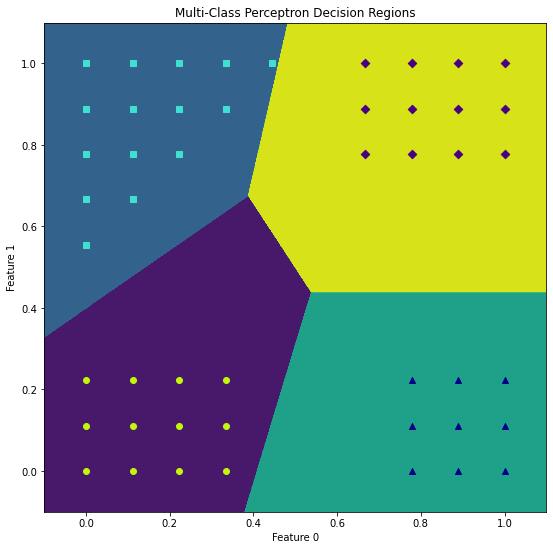

In [5]:
# plotting points and decision boundaries
fig, ax = plt.subplots()
fig.set_size_inches(9, 9)

# axis labels, title
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_title('Multi-Class Perceptron Decision Regions')

# adding decision boundaries
weights = fc.optimal_weights
bias = fc.optimal_bias
h = .001
x_min, x_max = data[:, 0].min() - .1, data[:, 0].max() + .1
y_min, y_max = data[:, 1].min() - .1, data[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), \
    np.arange(y_min, y_max, h))
Z = fc.predict(weights, bias, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap = 'viridis')

# loop to plot multiple scatters
markers = ['o', 's', '^', 'D']
colors = ['#c1f80a', '#40e0d0', '#00008b', '#480082']
for i in range(fc.classes):
    ind = np.where(labels[:, 0] == i)
    ax.scatter(data[ind, 0], data[ind, 1], c = colors[i], marker = markers[i], label = f'label {i}')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plt.show()